In [1]:
#import libraries
import sqlite3
from urllib.request import urlretrieve
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import seaborn as sns
import os
import requests as req
import json
import time
import random
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from riotwatcher import LolWatcher, ApiError

In [2]:
#load the data
team_data = pd.read_csv('/Users/dankang/Desktop/SpringBoard/Capstone2/Capstone2/data/processed/Wrangled_LoL_Data.csv')

In [3]:
team_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 84 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   season                    47 non-null     int64  
 1   team                      47 non-null     object 
 2   gamesplayed               47 non-null     float64
 3   Win_Percentage            47 non-null     float64
 4   Wins                      47 non-null     float64
 5   Losses                    47 non-null     float64
 6   patch                     47 non-null     float64
 7   gamelength                47 non-null     float64
 8   kills                     47 non-null     float64
 9   deaths                    47 non-null     float64
 10  assists                   47 non-null     float64
 11  teamkills                 47 non-null     float64
 12  teamdeaths                47 non-null     float64
 13  doublekills               47 non-null     float64
 14  triplekills 

In [4]:
team_data.head()

,season,team,gamesplayed,Win_Percentage,Wins,Losses,patch,gamelength,kills,deaths,...,csdiffat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15
0,2020,100 Thieves,49.0,0.408163,20.0,29.0,494.06,98775.0,534.0,625.0,...,-99.0,1159872.0,1402835.0,24271.0,1196839.0,1427357.0,24539.0,-36967.0,-24522.0,-268.0
1,2020,Cloud9,57.0,0.771930,44.0,13.0,575.34,106591.0,892.0,528.0,...,824.0,1457462.0,1699932.0,29083.0,1339319.0,1616509.0,27782.0,118143.0,83423.0,1301.0
2,2020,Counter Logic Gaming,37.0,0.216216,8.0,29.0,373.13,76646.0,360.0,532.0,...,-139.0,869714.0,1069385.0,18978.0,926688.0,1108046.0,19352.0,-56974.0,-38661.0,-374.0
3,2020,Dignitas,42.0,0.357143,15.0,27.0,423.73,86579.0,390.0,464.0,...,-321.0,1007052.0,1219211.0,21575.0,1028798.0,1237821.0,22083.0,-21746.0,-18610.0,-508.0
4,2020,Evil Geniuses,60.0,0.483333,29.0,31.0,605.52,121008.0,670.0,777.0,...,-499.0,1436032.0,1727591.0,29739.0,1465996.0,1747335.0,30474.0,-29964.0,-19744.0,-735.0


In [5]:
#set index
team_data = team_data.set_index(['season','team'])


In [6]:
team_data.head()

gamesplayed  Win_Percentage  Wins  Losses  \
season team                                                              
2020   100 Thieves                  49.0        0.408163  20.0    29.0   
       Cloud9                       57.0        0.771930  44.0    13.0   
       Counter Logic Gaming         37.0        0.216216   8.0    29.0   
       Dignitas                     42.0        0.357143  15.0    27.0   
       Evil Geniuses                60.0        0.483333  29.0    31.0   

                              patch  gamelength  kills  deaths  assists  \
season team                                                               
2020   100 Thieves           494.06     98775.0  534.0   625.0   1213.0   
       Cloud9                575.34    106591.0  892.0   528.0   2073.0   
       Counter Logic Gaming  373.13     76646.0  360.0   532.0    903.0   
       Dignitas              423.73     86579.0  390.0   464.0    931.0   
       Evil Geniuses         605.52    121008.0  670.0   777.0   1571.0   

                             teamkills  ...  csdiffat10   goldat15     xpat15  \
season team                             ...                                     
2020   100 Thieves               534.0  ...       -99.0  1159872.0  1402835.0   
       Cloud9                    892.0  ...       824.0  1457462.0  1699932.0   
       Counter Logic Gaming      360.0  ...      -139.0   869714.0  1069385.0   
       Dignitas                  390.0  ...      -321.0  1007052.0  1219211.0   
       Evil Geniuses             670.0  ...      -499.0  1436032.0  1727591.0   

                              csat15  opp_goldat15  opp_xpat15  opp_csat15  \
season team                                                                  
2020   100 Thieves           24271.0     1196839.0   1427357.0     24539.0   
       Cloud9                29083.0     1339319.0   1616509.0     27782.0   
       Counter Logic Gaming  18978.0      926688.0   1108046.0     19352.0   
       Dignitas              21575.0     1028798.0   1237821.0     22083.0   
       Evil Geniuses         29739.0     1465996.0   1747335.0     30474.0   

                             golddiffat15  xpdiffat15  csdiffat15  
season team                                                        
2020   100 Thieves               -36967.0    -24522.0      -268.0  
       Cloud9                    118143.0     83423.0      1301.0  
       Counter Logic Gaming      -56974.0    -38661.0      -374.0  
       Dignitas                  -21746.0    -18610.0      -508.0  
       Evil Geniuses             -29964.0    -19744.0      -735.0  

[5 rows x 82 columns]

In [7]:
#Check for NAs
team_data.isnull().sum()

gamesplayed       0
Win_Percentage    0
Wins              0
Losses            0
patch             0
                 ..
opp_xpat15        0
opp_csat15        0
golddiffat15      0
xpdiffat15        0
csdiffat15        0
Length: 82, dtype: int64

In [8]:
#lets see some summary stats
team_data.describe()

,gamesplayed,Win_Percentage,Wins,Losses,patch,gamelength,kills,deaths,assists,teamkills,...,csdiffat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,...,47.000000,4.700000e+01,4.700000e+01,47.000000,4.700000e+01,4.700000e+01,47.000000,47.000000,47.000000,47.000000
mean,62.574468,0.524529,34.148936,28.425532,447.601489,133862.234043,783.148936,729.000000,1899.595745,783.148936,...,86.617021,1.476558e+06,1.804205e+06,29628.446809,1.467044e+06,1.795889e+06,29483.340426,9513.404255,8315.787234,145.106383
std,22.263974,0.145452,16.285468,11.084154,179.644867,48377.190873,355.685131,309.560207,841.875924,355.685131,...,517.332815,5.303468e+05,6.414473e+05,10027.391945,5.251680e+05,6.380042e+05,9969.860420,40292.093515,32463.997161,841.084890
min,21.000000,0.190476,4.000000,13.000000,126.620000,46931.000000,204.000000,269.000000,491.000000,204.000000,...,-1031.000000,4.946180e+05,5.797180e+05,8953.000000,5.072860e+05,5.829410e+05,9114.000000,-56974.000000,-68364.000000,-2036.000000
25%,47.000000,0.419991,21.500000,22.000000,295.250000,100273.000000,504.000000,524.500000,1182.500000,504.000000,...,-345.000000,1.073054e+06,1.317068e+06,23067.500000,1.079968e+06,1.318742e+06,22427.500000,-18105.000000,-16617.000000,-491.500000
50%,57.000000,0.533333,34.000000,26.000000,462.980000,121008.000000,730.000000,604.000000,1768.000000,730.000000,...,82.000000,1.344983e+06,1.668505e+06,27650.000000,1.321923e+06,1.616509e+06,27782.000000,7552.000000,8500.000000,136.000000
75%,76.000000,0.626867,44.000000,31.500000,519.735000,158395.000000,1039.500000,875.500000,2491.500000,1039.500000,...,432.000000,1.807012e+06,2.157392e+06,34238.500000,1.792387e+06,2.096153e+06,32881.500000,36122.500000,23084.500000,696.000000
max,109.000000,0.771930,73.000000,66.000000,772.570000,237727.000000,1564.000000,1508.000000,3712.000000,1564.000000,...,1368.000000,2.557348e+06,3.158404e+06,50940.000000,2.603592e+06,3.179454e+06,51611.000000,118143.000000,94140.000000,1963.000000


In [9]:
#assess data types
team_data.dtypes

gamesplayed       float64
Win_Percentage    float64
Wins              float64
Losses            float64
patch             float64
                   ...   
opp_xpat15        float64
opp_csat15        float64
golddiffat15      float64
xpdiffat15        float64
csdiffat15        float64
Length: 82, dtype: object

In [10]:
#get the columns
team_data.columns

Index(['gamesplayed', 'Win_Percentage', 'Wins', 'Losses', 'patch',
       'gamelength', 'kills', 'deaths', 'assists', 'teamkills', 'teamdeaths',
       'doublekills', 'triplekills', 'quadrakills', 'pentakills', 'firstblood',
       'team kpm', 'ckpm', 'firstdragon', 'dragons', 'opp_dragons',
       'elementaldrakes', 'opp_elementaldrakes', 'infernals', 'mountains',
       'clouds', 'oceans', 'dragons (type unknown)', 'elders', 'opp_elders',
       'firstherald', 'heralds', 'opp_heralds', 'firstbaron', 'barons',
       'opp_barons', 'firsttower', 'towers', 'opp_towers', 'firstmidtower',
       'firsttothreetowers', 'inhibitors', 'opp_inhibitors',
       'damagetochampions', 'dpm', 'damagetakenperminute',
       'damagemitigatedperminute', 'wardsplaced', 'wpm', 'wardskilled', 'wcpm',
       'controlwardsbought', 'visionscore', 'vspm', 'totalgold', 'earnedgold',
       'earned gpm', 'goldspent', 'gspd', 'minionkills', 'monsterkills',
       'monsterkillsownjungle', 'monsterkillsenemyjungl

In [11]:
team_data.Win_Percentage.value_counts()

0.324324    2
0.388889    2
0.666667    1
0.533333    1
0.743590    1
0.400000    1
0.591837    1
0.592593    1
0.440000    1
0.607595    1
0.740741    1
0.643564    1
0.483333    1
0.559322    1
0.569767    1
0.659574    1
0.573333    1
0.644737    1
0.457143    1
0.500000    1
0.357143    1
0.577465    1
0.390244    1
0.520833    1
0.572917    1
0.510638    1
0.576271    1
0.431818    1
0.654545    1
0.701923    1
0.450980    1
0.610169    1
0.216216    1
0.441860    1
0.771930    1
0.753247    1
0.396825    1
0.408163    1
0.753623    1
0.504587    1
0.190476    1
0.537736    1
0.709091    1
0.530612    1
0.250000    1
Name: Win_Percentage, dtype: int64

In [12]:
#lets see who has highest win percentage
team_data.Win_Percentage.sort_values(ascending=False).head()

season  team        
2020    Cloud9          0.771930
2014    Cloud9          0.753623
2016    Immortals       0.753247
        Team SoloMid    0.743590
2019    Team Liquid     0.740741
Name: Win_Percentage, dtype: float64

In [13]:
#lets see who has highest kills
team_data.kills.sort_values(ascending=False).head()

season  team                
2017    Counter Logic Gaming    1564.0
        Team SoloMid            1532.0
        Cloud9                  1458.0
        Immortals               1365.0
        Team Liquid             1309.0
Name: kills, dtype: float64

In [14]:
#assists
team_data.assists.sort_values(ascending=False).head()

season  team                
2017    Team SoloMid            3712.0
        Counter Logic Gaming    3574.0
        Cloud9                  3531.0
        Dignitas                3222.0
        Team Liquid             3054.0
Name: assists, dtype: float64

In [15]:
team_data.firstblood.sort_values(ascending=False).head()

season  team                
2017    Counter Logic Gaming    60.0
        Team Liquid             58.0
        Immortals               54.0
        Cloud9                  50.0
2014    Counter Logic Gaming    47.0
Name: firstblood, dtype: float64

In [16]:
#lets track our important features
key_stats = ['Win_Percentage', 'Wins', 'Losses', 'kills', 'assists', 'firstblood']

In [17]:
team_data.firstdragon.sort_values(ascending=False).head()

season  team                
2017    Team SoloMid            60.0
        Immortals               58.0
2016    Counter Logic Gaming    55.0
        Team SoloMid            55.0
2017    FlyQuest                53.0
Name: firstdragon, dtype: float64

In [18]:
#add this as another key feature
key_stats.append('firstdragon')

In [19]:
team_data.mountains.sort_values(ascending=False).head()

season  team        
2017    Team SoloMid    63.0
        Dignitas        52.0
        Cloud9          50.0
2020    FlyQuest        46.0
2017    Immortals       43.0
Name: mountains, dtype: float64

In [20]:
key_stats.append('mountains')

In [21]:
team_data.oceans.sort_values(ascending=False).head()

season  team                
2017    Counter Logic Gaming    67.0
        Team SoloMid            55.0
2020    Team SoloMid            51.0
2017    Cloud9                  47.0
        Dignitas                47.0
Name: oceans, dtype: float64

In [22]:
key_stats.append('oceans')

In [23]:
other_key_stats = ['gamesplayed','kills', 'deaths', 'firstblood','assists', 'wardskilled', 'controlwardsbought', 'firsttower', 'towers', 'firsttothreetowers', 'totalgold', 'earnedgold', 'goldspent', 'minionkills', 'monsterkills', 'inhibitors']

In [24]:
key_stats = key_stats + other_key_stats 

In [25]:
key_stats

['Win_Percentage',
 'Wins',
 'Losses',
 'kills',
 'assists',
 'firstblood',
 'firstdragon',
 'mountains',
 'oceans',
 'gamesplayed',
 'kills',
 'deaths',
 'firstblood',
 'assists',
 'wardskilled',
 'controlwardsbought',
 'firsttower',
 'towers',
 'firsttothreetowers',
 'totalgold',
 'earnedgold',
 'goldspent',
 'minionkills',
 'monsterkills',
 'inhibitors']

In [26]:
df_key_stats = team_data[key_stats]
df_copy = df_key_stats

In [27]:
games_played_array = df_key_stats['gamesplayed']
print(games_played_array)

season  team                
2020    100 Thieves              49.0
        Cloud9                   57.0
        Counter Logic Gaming     37.0
        Dignitas                 42.0
        Evil Geniuses            60.0
        FlyQuest                 75.0
        Golden Guardians         51.0
        Immortals                37.0
        Team Liquid              49.0
        Team SoloMid             71.0
2019    100 Thieves              37.0
        Cloud9                   51.0
        Counter Logic Gaming     48.0
        FlyQuest                 45.0
        Golden Guardians         43.0
        Team Liquid              54.0
        Team SoloMid             54.0
2018    100 Thieves              59.0
        Cloud9                   49.0
        Counter Logic Gaming     36.0
        FlyQuest                 41.0
        Golden Guardians         36.0
        Team Liquid              55.0
        Team SoloMid             59.0
2017    Cloud9                  101.0
        Counter Logic

In [45]:
df_key_stats = df_key_stats.loc[:,~df_key_stats.columns.duplicated()]

In [46]:
to_be_divided = ['kills', 'deaths', 'firstblood','assists', 'wardskilled', 'controlwardsbought', 'firsttower', 'towers', 'firsttothreetowers', 'totalgold', 'earnedgold', 'goldspent', 'minionkills', 'monsterkills', 'inhibitors']

In [47]:
df_copy = df_key_stats[to_be_divided].div(df_key_stats['gamesplayed'].values,axis=0)

In [48]:
df_copy.head(1000)

kills     deaths  firstblood    assists  \
season team                                                                
2020   100 Thieves           10.897959  12.755102    0.448980  24.755102   
       Cloud9                15.649123   9.263158    0.561404  36.368421   
       Counter Logic Gaming   9.729730  14.378378    0.405405  24.405405   
       Dignitas               9.285714  11.047619    0.476190  22.166667   
       Evil Geniuses         11.166667  12.950000    0.483333  26.183333   
       FlyQuest              12.733333  11.000000    0.600000  31.266667   
       Golden Guardians       9.529412  12.000000    0.470588  22.588235   
       Immortals              8.054054  12.486486    0.351351  19.324324   
       Team Liquid           11.428571   9.489796    0.408163  28.326531   
       Team SoloMid          12.309859  10.338028    0.619718  30.070423   
2019   100 Thieves            8.648649  11.324324    0.378378  20.945946   
       Cloud9                14.313725  10.509804    0.568627  33.549020   
       Counter Logic Gaming  10.291667  10.895833    0.458333  23.812500   
       FlyQuest               9.466667  10.533333    0.577778  23.688889   
       Golden Guardians      10.767442  12.232558    0.511628  25.511628   
       Team Liquid           13.629630   9.222222    0.518519  33.351852   
       Team SoloMid          11.981481  10.685185    0.574074  29.092593   
2018   100 Thieves           10.864407   9.694915    0.627119  27.237288   
       Cloud9                11.081633  10.979592    0.489796  28.163265   
       Counter Logic Gaming  10.666667  11.055556    0.666667  26.777778   
       FlyQuest              10.000000  12.146341    0.414634  24.951220   
       Golden Guardians       9.777778  11.694444    0.444444  23.472222   
       Team Liquid           11.272727   8.254545    0.527273  29.945455   
       Team SoloMid          10.457627   9.118644    0.559322  25.338983   
2017   Cloud9                14.435644  11.148515    0.495050  34.960396   
       Counter Logic Gaming  14.754717  14.207547    0.566038  33.716981   
       Dignitas              11.807339  12.183486    0.394495  29.559633   
       FlyQuest              12.350000  15.080000    0.450000  27.190000   
       Immortals             14.218750  13.156250    0.562500  31.604167   
       Team Liquid           12.120370  13.203704    0.537037  28.277778   
       Team SoloMid          14.730769  11.519231    0.442308  35.692308   
2016   Cloud9                14.012658  10.670886    0.531646  34.569620   
       Counter Logic Gaming  12.255814  12.255814    0.511628  29.372093   
       Dignitas               9.714286  12.809524    0.523810  23.380952   
       Immortals             15.415584  11.922078    0.506494  38.532468   
       Team Liquid           12.644737  11.986842    0.539474  31.802632   
       Team SoloMid          14.307692   9.935897    0.551282  36.166667   
2015   Cloud9                11.723404  12.255319    0.468085  31.106383   
       Counter Logic Gaming  15.255319  12.425532    0.723404  39.659574   
       Dignitas              11.681818  12.409091    0.522727  27.840909   
       Team Liquid           14.305085  11.830508    0.525424  38.101695   
       Team SoloMid          13.981818  10.981818    0.454545  36.745455   
2014   Cloud9                14.855072  10.072464    0.565217  35.608696   
       Counter Logic Gaming  12.613333  12.093333    0.626667  30.533333   
       Dignitas              11.771429  12.557143    0.471429  28.085714   
       Evil Geniuses         12.238095  13.841270    0.380952  28.063492   
       Team SoloMid          14.026316  10.276316    0.447368  34.605263   

                             wardskilled  controlwardsbought  firsttower  \
season team                                                                
2020   100 Thieves             49.020408           42.979592    0.510204   
       Cloud9                  41.771930           37.789474    0.754386   
    

In [49]:
df_copy.columns = ['kills_pg', 'deaths_pg', 'firstblood_pg','assists_pg', 'wardskilled_pg', 'controlwardsbought_pg', 'firsttower_pg', 'towers_pg', 'firsttothreetowers_pg', 'totalgold_pg', 'earnedgold_pg', 'goldspent_pg', 'minionkills_pg', 'monsterkills_pg', 'inhibitors_pg']

In [50]:
df_copy.head()

kills_pg  deaths_pg  firstblood_pg  assists_pg  \
season team                                                                    
2020   100 Thieves           10.897959  12.755102       0.448980   24.755102   
       Cloud9                15.649123   9.263158       0.561404   36.368421   
       Counter Logic Gaming   9.729730  14.378378       0.405405   24.405405   
       Dignitas               9.285714  11.047619       0.476190   22.166667   
       Evil Geniuses         11.166667  12.950000       0.483333   26.183333   

                             wardskilled_pg  controlwardsbought_pg  \
season team                                                          
2020   100 Thieves                49.020408              42.979592   
       Cloud9                     41.771930              37.789474   
       Counter Logic Gaming       46.594595              44.189189   
       Dignitas                   49.095238              43.166667   
       Evil Geniuses              47.016667              47.333333   

                             firsttower_pg  towers_pg  firsttothreetowers_pg  \
season team                                                                    
2020   100 Thieves                0.510204   5.612245               0.367347   
       Cloud9                     0.754386   8.000000               0.754386   
       Counter Logic Gaming       0.324324   4.054054               0.270270   
       Dignitas                   0.404762   4.619048               0.333333   
       Evil Geniuses              0.433333   6.083333               0.516667   

                             totalgold_pg  earnedgold_pg  goldspent_pg  \
season team                                                              
2020   100 Thieves           57166.857143   35227.510204  53744.040816   
       Cloud9                58425.631579   37973.438596  52644.842105   
       Counter Logic Gaming  57389.864865   34882.405405  54264.459459   
       Dignitas              57318.428571   34914.142857  54120.047619   
       Evil Geniuses         57701.816667   35752.533333  53983.800000   

                             minionkills_pg  monsterkills_pg  inhibitors_pg  
season team                                                                  
2020   100 Thieves               854.571429       205.959184       1.020408  
       Cloud9                    796.052632       221.631579       1.508772  
       Counter Logic Gaming      896.594595       199.594595       0.540541  
       Dignitas                  886.809524       217.928571       0.571429  
       Evil Geniuses             854.000000       208.866667       1.050000

In [51]:
master_df = pd.concat([df_copy, df_key_stats], axis=1)

In [52]:
master_df.head(1000)

kills_pg  deaths_pg  firstblood_pg  assists_pg  \
season team                                                                    
2020   100 Thieves           10.897959  12.755102       0.448980   24.755102   
       Cloud9                15.649123   9.263158       0.561404   36.368421   
       Counter Logic Gaming   9.729730  14.378378       0.405405   24.405405   
       Dignitas               9.285714  11.047619       0.476190   22.166667   
       Evil Geniuses         11.166667  12.950000       0.483333   26.183333   
       FlyQuest              12.733333  11.000000       0.600000   31.266667   
       Golden Guardians       9.529412  12.000000       0.470588   22.588235   
       Immortals              8.054054  12.486486       0.351351   19.324324   
       Team Liquid           11.428571   9.489796       0.408163   28.326531   
       Team SoloMid          12.309859  10.338028       0.619718   30.070423   
2019   100 Thieves            8.648649  11.324324       0.378378   20.945946   
       Cloud9                14.313725  10.509804       0.568627   33.549020   
       Counter Logic Gaming  10.291667  10.895833       0.458333   23.812500   
       FlyQuest               9.466667  10.533333       0.577778   23.688889   
       Golden Guardians      10.767442  12.232558       0.511628   25.511628   
       Team Liquid           13.629630   9.222222       0.518519   33.351852   
       Team SoloMid          11.981481  10.685185       0.574074   29.092593   
2018   100 Thieves           10.864407   9.694915       0.627119   27.237288   
       Cloud9                11.081633  10.979592       0.489796   28.163265   
       Counter Logic Gaming  10.666667  11.055556       0.666667   26.777778   
       FlyQuest              10.000000  12.146341       0.414634   24.951220   
       Golden Guardians       9.777778  11.694444       0.444444   23.472222   
       Team Liquid           11.272727   8.254545       0.527273   29.945455   
       Team SoloMid          10.457627   9.118644       0.559322   25.338983   
2017   Cloud9                14.435644  11.148515       0.495050   34.960396   
       Counter Logic Gaming  14.754717  14.207547       0.566038   33.716981   
       Dignitas              11.807339  12.183486       0.394495   29.559633   
       FlyQuest              12.350000  15.080000       0.450000   27.190000   
       Immortals             14.218750  13.156250       0.562500   31.604167   
       Team Liquid           12.120370  13.203704       0.537037   28.277778   
       Team SoloMid          14.730769  11.519231       0.442308   35.692308   
2016   Cloud9                14.012658  10.670886       0.531646   34.569620   
       Counter Logic Gaming  12.255814  12.255814       0.511628   29.372093   
       Dignitas               9.714286  12.809524       0.523810   23.380952   
       Immortals             15.415584  11.922078       0.506494   38.532468   
       Team Liquid           12.644737  11.986842       0.539474   31.802632   
       Team SoloMid          14.307692   9.935897       0.551282   36.166667   
2015   Cloud9                11.723404  12.255319       0.468085   31.106383   
       Counter Logic Gaming  15.255319  12.425532       0.723404   39.659574   
       Dignitas              11.681818  12.409091       0.522727   27.840909   
       Team Liquid           14.305085  11.830508       0.525424   38.101695   
       Team SoloMid          13.981818  10.981818       0.454545   36.745455   
2014   Cloud9                14.855072  10.072464       0.565217   35.608696   
       Counter Logic Gaming  12.613333  12.093333       0.626667   30.533333   
       Dignitas              11.771429  12.557143       0.471429   28.085714   
       Evil Geniuses         12.238095  13.841270       0.380952   28.063492   
       Team SoloMid          14.026316  10.276316       0.447368   34.605263   

                             wardskilled_pg  controlwardsbought_pg  \
season team                            

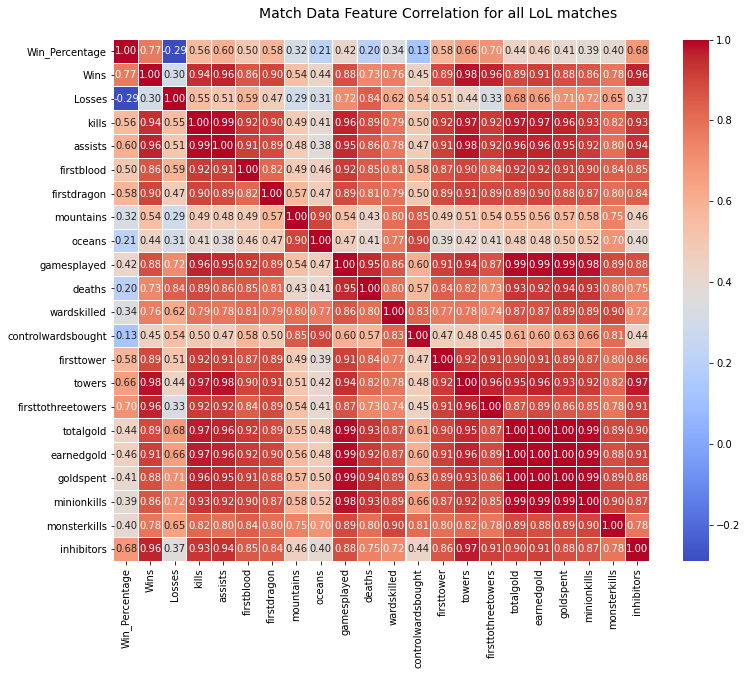

In [53]:
corrmat = df_key_stats.corr()
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Match Data Feature Correlation for all LoL matches', fontsize=14)

In [56]:
df = master_df[['Win_Percentage', 'Wins', 'Losses','kills_pg', 'deaths_pg', 'firstblood_pg','assists_pg', 'wardskilled_pg', 'controlwardsbought_pg', 'firsttower_pg', 'towers_pg', 'firsttothreetowers_pg', 'totalgold_pg', 'earnedgold_pg', 'goldspent_pg', 'minionkills_pg', 'monsterkills_pg', 'inhibitors_pg']]

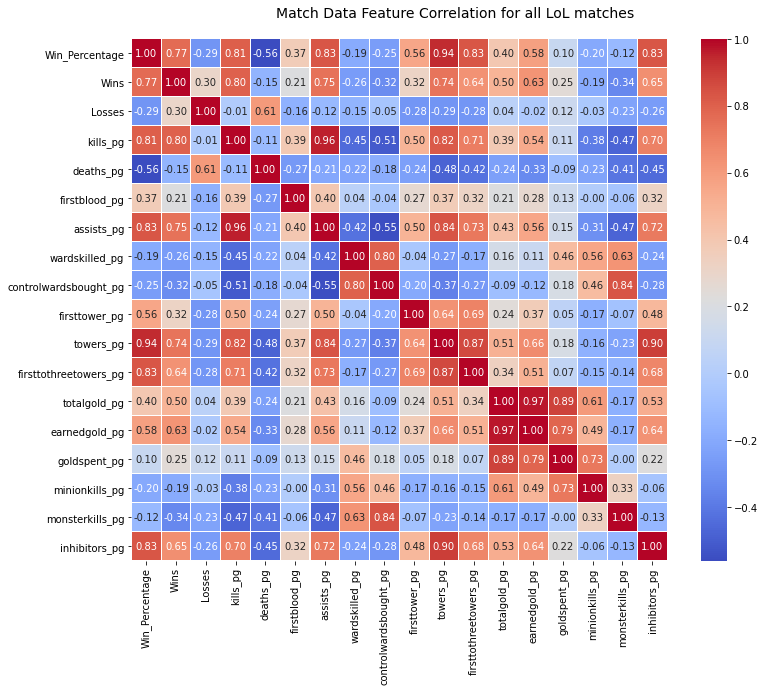

In [57]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Match Data Feature Correlation for all LoL matches', fontsize=14)

Here we can see that kills per game, assists per game, and towers per game are among the most important features with correlations higher than 0.8

<AxesSubplot:>

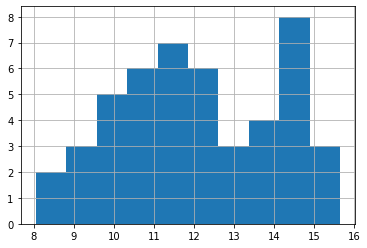

In [58]:
df.kills_pg.hist()

<AxesSubplot:>

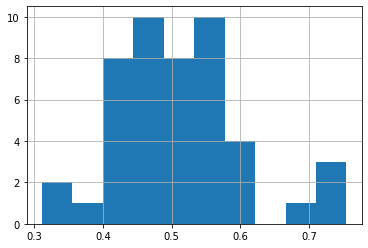

In [60]:
df.firsttower_pg.hist()

<AxesSubplot:>

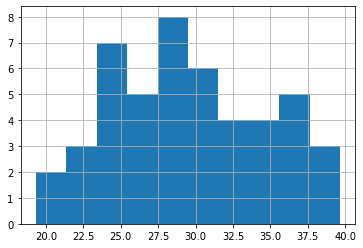

In [62]:
df.assists_pg.hist()

In [66]:
key_stats_scale = scale(master_df)

In [67]:
df_key_stats_scaled = pd.DataFrame(key_stats_scale, columns=master_df.columns)
df_key_stats_scaled.head()

,kills_pg,deaths_pg,firstblood_pg,assists_pg,wardskilled_pg,controlwardsbought_pg,firsttower_pg,towers_pg,firsttothreetowers_pg,totalgold_pg,...,controlwardsbought,firsttower,towers,firsttothreetowers,totalgold,earnedgold,goldspent,minionkills,monsterkills,inhibitors
0,-0.617819,0.832713,-0.775923,-0.943942,0.346682,0.707423,0.007141,-0.839237,-1.111484,-1.786937,...,0.058966,-0.564587,-0.820716,-0.985449,-0.758435,-0.791630,-0.708752,-0.772462,-0.275489,-0.762936
1,1.801695,-1.581395,0.669102,1.366704,-0.488590,0.302264,2.649128,1.337687,1.865468,-1.336698,...,0.109779,0.869769,0.214857,0.661638,-0.397775,-0.333213,-0.433556,-0.601105,0.454926,0.301275
2,-1.212736,1.954943,-1.335998,-1.013520,0.067145,0.801848,-2.004031,-2.259845,-1.858159,-1.707171,...,-0.439634,-1.600510,-1.535891,-1.512516,-1.220436,-1.247077,-1.177533,-1.198285,-1.053620,-1.649779
3,-1.438849,-0.347733,-0.426172,-1.458951,0.355305,0.722026,-1.133717,-1.744738,-1.373103,-1.732723,...,-0.251204,-1.202078,-1.284149,-1.248983,-1.026877,-1.063282,-0.978791,-0.998980,-0.545406,-1.531533
4,-0.480981,0.967453,-0.334362,-0.659774,0.115782,1.047291,-0.824581,-0.409744,0.037025,-1.595592,...,0.835979,-0.484900,-0.305790,-0.128963,-0.307898,-0.353433,-0.255032,-0.314042,0.425893,-0.378638


In [68]:
master_df.mean()

kills_pg                 1.211116e+01
deaths_pg                1.155060e+01
firstblood_pg            5.093469e-01
assists_pg               2.949936e+01
wardskilled_pg           4.601191e+01
controlwardsbought_pg    3.391744e+01
firsttower_pg            5.095440e-01
towers_pg                6.532760e+00
firsttothreetowers_pg    5.118530e-01
totalgold_pg             6.216276e+04
earnedgold_pg            3.930236e+04
goldspent_pg             5.697684e+04
minionkills_pg           9.249816e+02
monsterkills_pg          1.803119e+02
inhibitors_pg            1.178446e+00
Win_Percentage           5.245292e-01
Wins                     3.414894e+01
Losses                   2.842553e+01
kills                    7.831489e+02
assists                  1.899596e+03
firstblood               3.200000e+01
firstdragon              3.176596e+01
mountains                2.287234e+01
oceans                   2.427660e+01
gamesplayed              6.257447e+01
deaths                   7.290000e+02
wardskilled 

In [69]:
master_df.std()

kills_pg                 1.984915e+00
deaths_pg                1.462112e+00
firstblood_pg            7.864177e-02
assists_pg               5.080343e+00
wardskilled_pg           8.771802e+00
controlwardsbought_pg    1.294858e+01
firsttower_pg            9.342278e-02
towers_pg                1.108706e+00
firsttothreetowers_pg    1.314174e-01
totalgold_pg             2.826020e+03
earnedgold_pg            2.413289e+03
goldspent_pg             2.660281e+03
minionkills_pg           6.652452e+01
monsterkills_pg          2.940287e+01
inhibitors_pg            2.747567e-01
Win_Percentage           1.454520e-01
Wins                     1.628547e+01
Losses                   1.108415e+01
kills                    3.556851e+02
assists                  8.418759e+02
firstblood               1.226696e+01
firstdragon              1.331102e+01
mountains                1.642720e+01
oceans                   1.739278e+01
gamesplayed              2.226397e+01
deaths                   3.095602e+02
wardskilled 

In [70]:
master_df.std(ddof=0)

kills_pg                 1.963685e+00
deaths_pg                1.446474e+00
firstblood_pg            7.780066e-02
assists_pg               5.026006e+00
wardskilled_pg           8.677984e+00
controlwardsbought_pg    1.281009e+01
firsttower_pg            9.242358e-02
towers_pg                1.096848e+00
firsttothreetowers_pg    1.300119e-01
totalgold_pg             2.795794e+03
earnedgold_pg            2.387477e+03
goldspent_pg             2.631828e+03
minionkills_pg           6.581300e+01
monsterkills_pg          2.908840e+01
inhibitors_pg            2.718181e-01
Win_Percentage           1.438964e-01
Wins                     1.611129e+01
Losses                   1.096560e+01
kills                    3.518809e+02
assists                  8.328716e+02
firstblood               1.213576e+01
firstdragon              1.316865e+01
mountains                1.625150e+01
oceans                   1.720676e+01
gamesplayed              2.202585e+01
deaths                   3.062493e+02
wardskilled 

In [71]:
Lol_pca = PCA().fit(key_stats_scale)

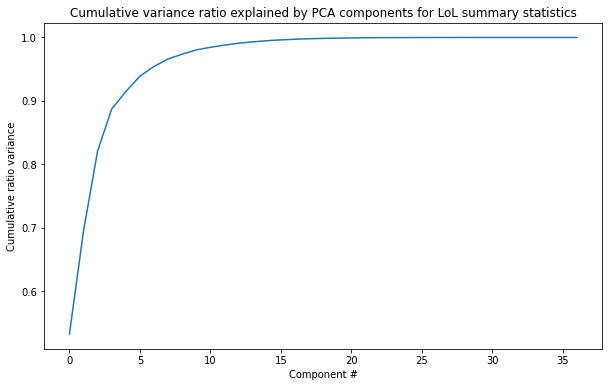

In [72]:
plt.subplots(figsize=(10, 6))
plt.plot(Lol_pca.explained_variance_ratio_.cumsum());
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for LoL summary statistics');

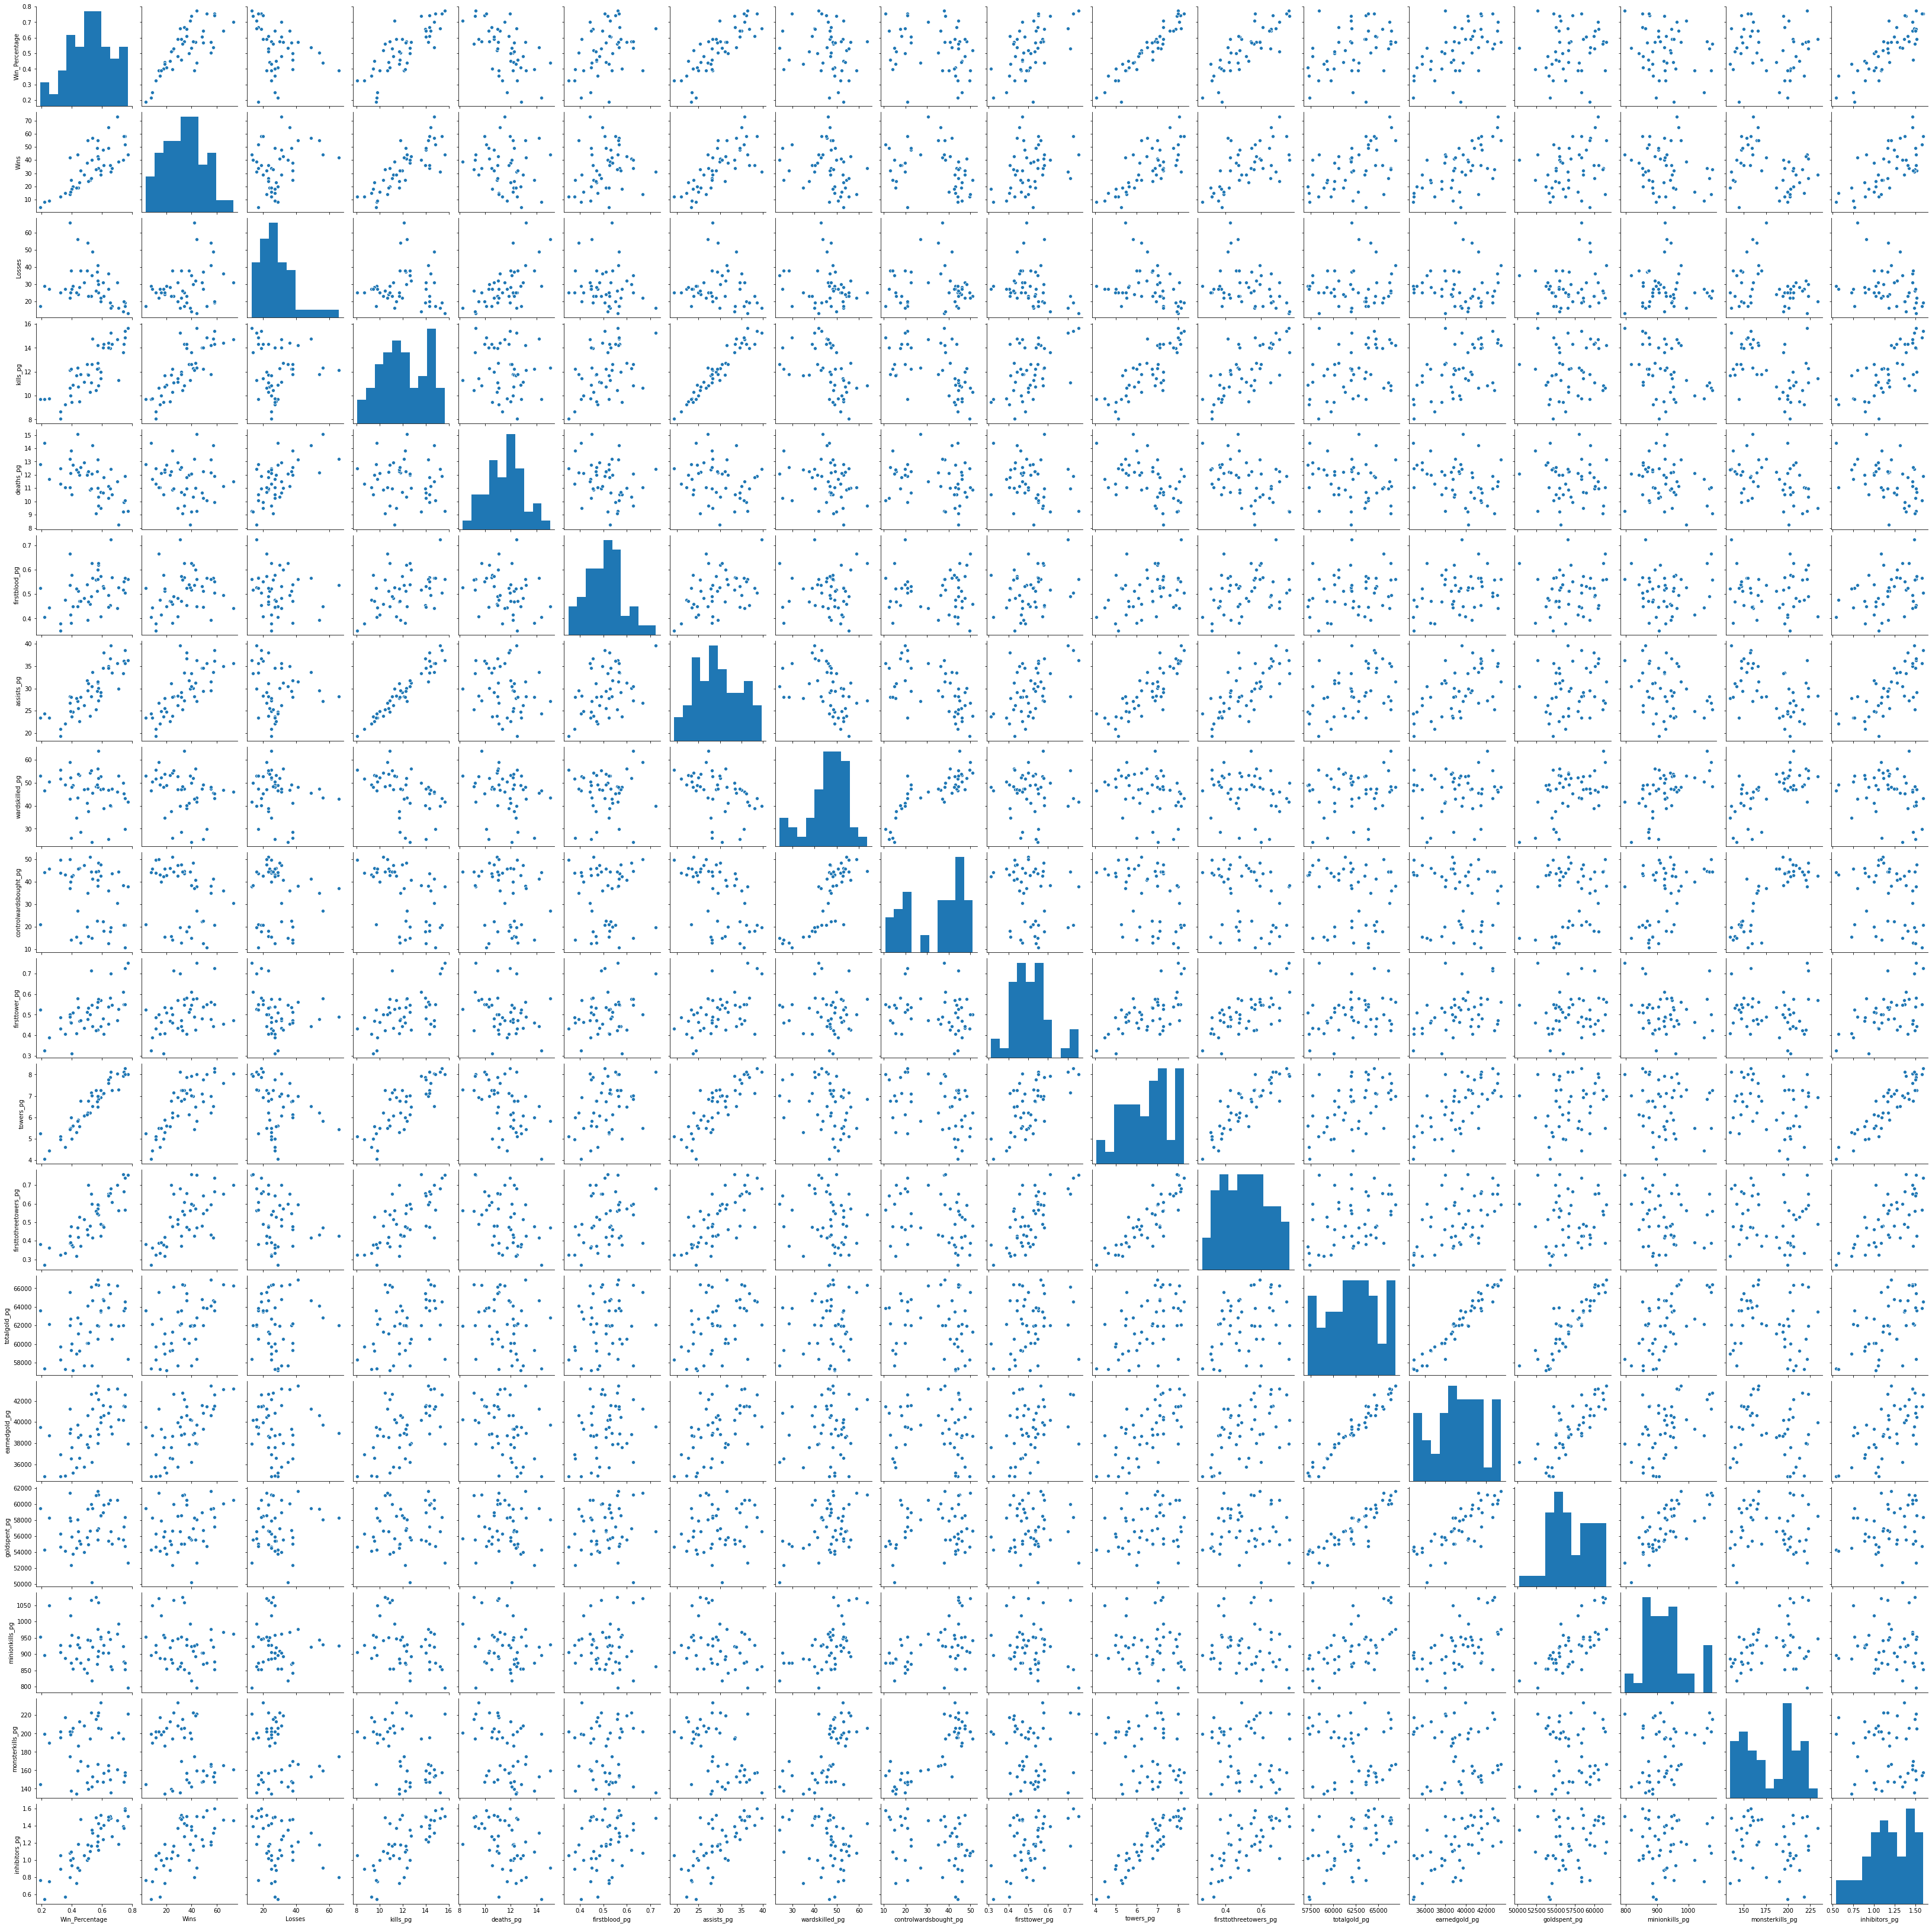

In [79]:
sns.pairplot(df)

5 components account for ~90% of the variance, and 10 account for ~97%. 

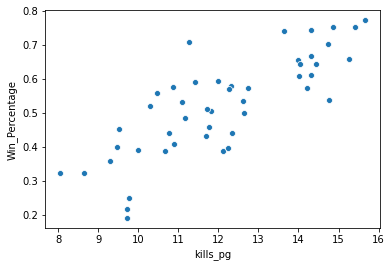

In [81]:
_ = sns.scatterplot(x='kills_pg',y='Win_Percentage', data=df)

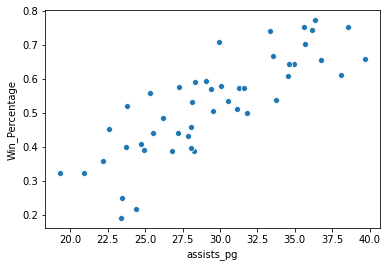

In [82]:
_ = sns.scatterplot(x='assists_pg',y='Win_Percentage', data=df)

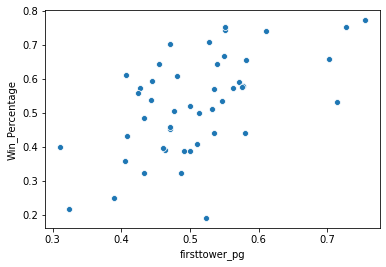

In [87]:
_ = sns.scatterplot(x='firsttower_pg',y='Win_Percentage', data=df)

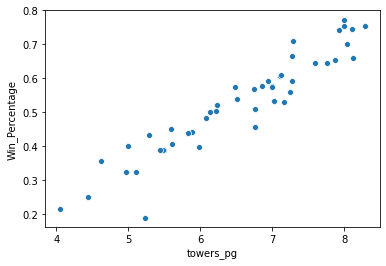

In [88]:
_ = sns.scatterplot(x='towers_pg',y='Win_Percentage', data=df)

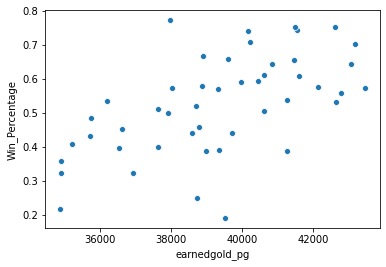

In [89]:
_ = sns.scatterplot(x='earnedgold_pg',y='Win_Percentage', data=df)

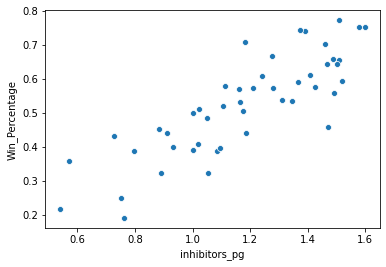

In [90]:
_ = sns.scatterplot(x='inhibitors_pg',y='Win_Percentage', data=df)